In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [209]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

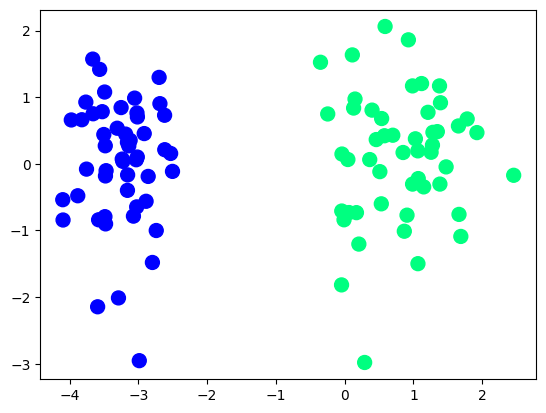

In [210]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [212]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [213]:
class OurLogisticRegression:
    def __init__(self, epochs=1, learning_rate=0.01):
      self.epoch = epochs
      self.learning_rate = learning_rate
      self.weights = None

    def fit(self, X_train, y_train):
      X_train = np.insert(X_train, 0, 1, axis=1)
      self.weights = np.zeros(X_train.shape[1])
      m,n = X_train.shape
      for i in range(self.epoch):
          pred = self.sigmoid(np.dot(X_train, self.weights))
          self.weights = self.weights + (self.learning_rate/m)*(np.dot((y_train-pred),X_train))

    def sigmoid(self, x):
      return 1/(1+np.exp(-x))

    def step(self, X):
      return 1 if X>=0 else 0
    def predict(self, X_test):
      X_test = np.insert(X_test, 0, 1, axis=1)
      y_pred = []
      for i in range(X_test.shape[0]):
        pred = self.step(np.dot(X_test[i], self.weights))
        y_pred.append(pred)
      return np.array(y_pred)

In [214]:
lr = OurLogisticRegression(epochs=5000, learning_rate=0.5)
lr.fit(X_train, y_train)

In [215]:
y_pred = lr.predict(X_test)

accuracy_score(y_test, y_pred)

1.0

In [216]:
intercept_ = lr.weights[0]
coef_ = lr.weights[1:]

In [217]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [218]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

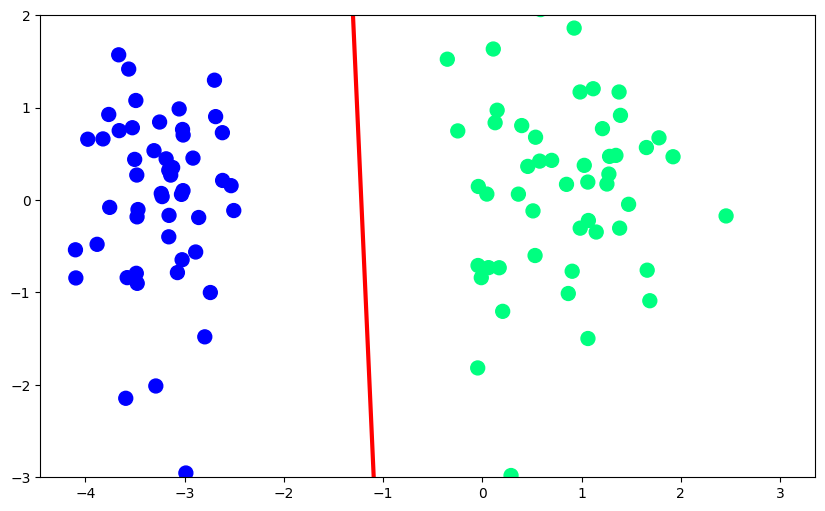

In [219]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [220]:
from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression(solver='sag', penalty=None)
lr2.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [221]:
y_pred2 = lr2.predict(X_test)

accuracy_score(y_test, y_pred2)

1.0

In [222]:
m2 = -(lr2.coef_[0][0]/lr2.coef_[0][1])
b2 = -(lr2.intercept_/lr2.coef_[0][1])

x_input2 = np.linspace(-3,3,100)
y_input2 = m2*x_input + b2

(-3.0, 2.0)

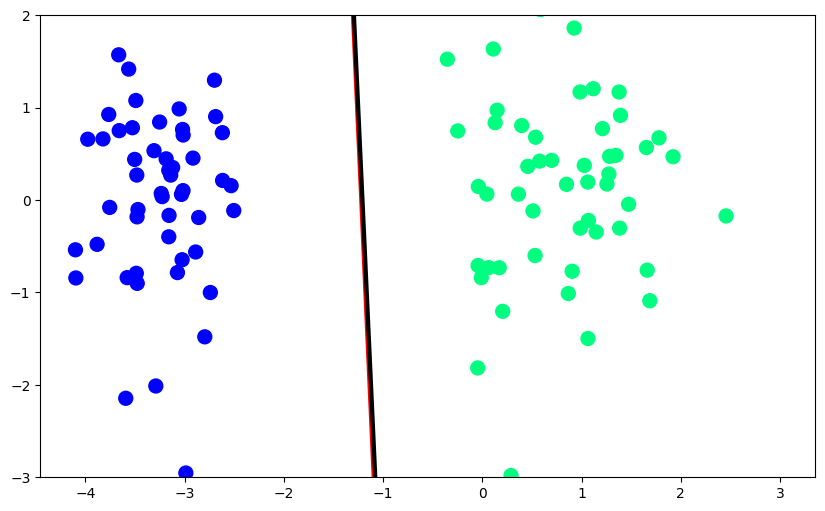

In [223]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input2,y_input2,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)